<a href="https://colab.research.google.com/github/dolt294/ken/blob/main/05_sound_class_flowrate_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNNを使ったヒグラシの音声認識（モデル構築編）～夏休みの自由研究～<br>
https://qiita.com/tomato1997/items/52f3d9775162c3283af8

最初に、収集した音源データを処理する<p>

ffmpeg を使って m4a を wav に変換し、その後で 指定秒数毎に<br>
ファイルを分割して、フォルダに格納する

分割方法は次のサイトを参考にした<br>
Pythonでwavファイルを分割<br>
https://coffee-blue-mountain.com/python-wav-cut-210809/<br>

ランタイム> ランタイムのタイプを変更　で<br>
ハードウェア アクセラレータを GPU に変更しておくこと<p>


In [1]:
import wave
import struct
import math
import os
from scipy import fromstring, int16

In [2]:
!pip install ffmpeg-python
import ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
def wav_cut(filename,time): 
 
    # ファイルを読み出し
    wavf = filename + '.wav'
    wr = wave.open(wavf, 'r')

 
    # waveファイルが持つ性質を取得
    ch = wr.getnchannels()
    width = wr.getsampwidth()
    fr = wr.getframerate()
    fn = wr.getnframes()
    total_time = 1.0 * fn / fr
    integer = math.floor(total_time) # 小数点以下切り捨て
    t = int(time)  # 秒数[sec]
    frames = int(ch * fr * t)
    num_cut = int(integer//t)
 
    #　確認用
    print("Channel: ", ch)
    print("Sample width: ", width)
    print("Frame Rate: ", fr)
    print("Frame num: ", fn)
    print("Params: ", wr.getparams())
    print("Total time: ", total_time)
    print("Total time(integer)",integer)
    print("Time: ", t) 
    print("Frames: ", frames) 
    print("Number of cut: ",num_cut)
    # waveの実データを取得し、数値化
    data = wr.readframes(wr.getnframes())
    wr.close()
    X = fromstring(data, dtype=int16)
    print(X)
 
    for i in range(num_cut):
        #print(i)
        # 出力データを生成
        # outf = 'output/' + str(i) + '.wav' 
        outf = filename + '/' + str(i) + '.wav' 
        start_cut = i*frames
        end_cut = i*frames + frames
        #print(start_cut)
        #print(end_cut)
        Y = X[start_cut:end_cut]
        outd = struct.pack("h" * len(Y), *Y)
 
        # 書き出し
        ww = wave.open(outf, 'w')
        ww.setnchannels(ch)
        ww.setsampwidth(width)
        ww.setframerate(fr)
        ww.writeframes(outd)
        ww.close()

後述の戻る場所はここです。<p>

In [20]:
# 取り込むファイル名に修正する   gfr01,02,03,04,05  gfr05 まで繰り返す
!wget "https://github.com/dolt294/ken/raw/main/gfr05.m4a"

--2023-06-08 01:31:54--  https://github.com/dolt294/ken/raw/main/gfr05.m4a
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dolt294/ken/main/gfr05.m4a [following]
--2023-06-08 01:31:55--  https://raw.githubusercontent.com/dolt294/ken/main/gfr05.m4a
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8486431 (8.1M) [application/octet-stream]
Saving to: ‘gfr05.m4a’

gfr05.m4a           100%[===================>]   8.09M  --.-KB/s    in 0.05s   

2023-06-08 01:31:55 (154 MB/s) - ‘gfr05.m4a’ saved [8486431/8486431]



In [21]:
# プログラム上で保存するフォルダを指定する。
# 上で修正したファイル名の拡張子を省いた部分を指定する。

f_name = "gfr05"
 
#切り取り時間[sec]
cut_time = 5

# 保存するフォルダの作成
file = os.path.exists(f_name)
print(file)
if file == False:
    os.mkdir(f_name)
# 保存するフォルダの作成
file = os.path.exists(f_name)
print(file)
if file == False:
    os.mkdir(f_name)

False
True


In [22]:
# ここで、ffmpeg を使ってファイル変換　m4a -> wav
# 音源ファイルの拡張子に合わせて修正すること
# wav_in  = f_name + '.m4a'

wav_in  = f_name + '.m4a'
wav_out = f_name + '.wav'
stream=ffmpeg.input(wav_in)
stream=ffmpeg.output(stream,wav_out)
ffmpeg.run(stream)

(None, None)

In [23]:
# 定義済みの関数を実行する
# 分割し、output フォルダに格納する
wav_cut(f_name,cut_time)

Channel:  1
Sample width:  2
Frame Rate:  48000
Frame num:  16361472
Params:  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=16361472, comptype='NONE', compname='not compressed')
Total time:  340.864
Total time(integer) 340
Time:  5
Frames:  240000
Number of cut:  68
[  0   0   0 ... -61 -68 -67]


<ipython-input-3-b818d3bd8618>:33: DeprecationWarning: scipy.fromstring is deprecated and will be removed in SciPy 2.0.0, use numpy.fromstring instead
  X = fromstring(data, dtype=int16)


フォルダ名を使いたい名前に変える<br>
左に表示されるまで時間差があるのです、少し待つ<p>
gfr01 -> class0 、gfr02 -> class1 , gfr03 -> class2 , gfr04 -> class3 ,gfr05 -> class4などのように<br>
別のファイルを変換する場合（.w4a等）があれば、上に戻ってファイル選択する<p>
必要なファイルが全て処理できたら、
あらたに folder という名前のフォルダを作り、その中に<br>
class0、class1、class2, class3, class4 のフォルダを移動する<br>

In [ ]:
# folder/class0   class1 ... 　のホルダーにwaveファイルを入れて、
# folder.zip の名前で圧縮したファイルをアップロードしておくこと
# 準備したのは、class0, class1,class2, ... classN なら N+1 種類に分類する問題
# !unzip folder.zip

In [24]:
import os
import glob
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [25]:
# load a wave data
def load_wave_data(audio_dir, file_name):
    file_path = os.path.join(audio_dir, file_name)
    x, fs = librosa.load(file_path, sr=44100)
    return x,fs

# change wave data to mel-stft
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

# display wave in plots
def show_wave(x):
    plt.plot(x)
    plt.show()

# display wave in heatmap
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs)
    plt.colorbar()
    plt.show()

# wavfile division
def wav_div_nparr(fname):
    x, fs = load_wave_data('', fname)
    xls = []
    for i in range(0,len(x)-fs,fs):
        xls.append(np.copy(x[i:i+fs]))
    return np.array(xls)

In [ ]:
folder = 'folder/'
files = glob.glob(folder+'class*/*.wav')
Xls = []
yls = []
for file in files:
    # print(file)
    label = file[file.find('class'):file.find('.wav')].split('/')[0][5:] # classの後の数字をとってくる
    x = wav_div_nparr(file)
    for i in range(x.shape[0]):
        melsp = calculate_melsp(x[i])
        Xls.append(melsp)
        yls.append(label)
X = np.array(Xls)
X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
Y = np.array(yls).astype(int)
print(X.shape,Y.shape)

In [27]:
print(Y)

[4 4 4 ... 3 3 3]


In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    random_state = 0,
    test_size = 0.2
)
# y to categorical
classes = np.max(Y)+1 #今回はクラス分類
# class3,class4,...,class9 までデータを作っておけば、10クラス分類問題になる（自動的に）
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

原波形、メルスペクトログラムの表示

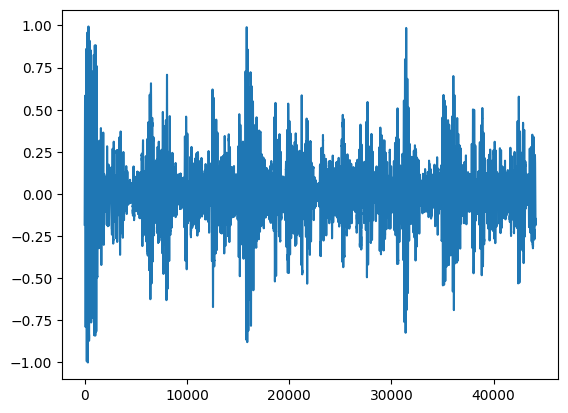

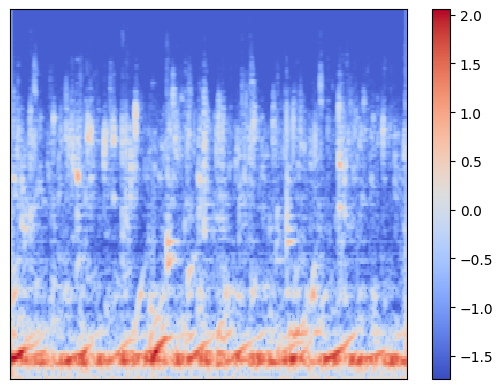

In [29]:
fs = 44100
# 次の行で、存在するファイル名を入れてある
X = wav_div_nparr('folder/class3/10.wav') # ファイル名は存在するものを指定
melsp = calculate_melsp(X[3])
show_wave(X[3])
show_melsp(melsp, fs)

In [30]:
from keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, GlobalAveragePooling2D,MaxPooling2D,Flatten
from keras.layers import BatchNormalization, Add

def cba(inputs, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

# define CNN
inputs = Input(shape=(x_train.shape[1:]))

x_1 = cba(inputs, filters=32, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=32, kernel_size=(8,1), strides=(2,1))
x_1 = MaxPooling2D(pool_size = (2, 2))(x_1)
x_1 = cba(x_1, filters=64, kernel_size=(1,8), strides=(1,2))
x_1 = cba(x_1, filters=64, kernel_size=(8,1), strides=(2,1))

x_2 = cba(inputs, filters=32, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=32, kernel_size=(16,1), strides=(2,1))
x_2 = MaxPooling2D(pool_size = (2, 2))(x_2)
x_2 = cba(x_2, filters=64, kernel_size=(1,16), strides=(1,2))
x_2 = cba(x_2, filters=64, kernel_size=(16,1), strides=(2,1))

x_3 = cba(inputs, filters=32, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=32, kernel_size=(32,1), strides=(2,1))
x_3 = MaxPooling2D(pool_size = (2, 2))(x_3)
x_3 = cba(x_3, filters=64, kernel_size=(1,32), strides=(1,2))
x_3 = cba(x_3, filters=64, kernel_size=(32,1), strides=(2,1))

x = Add()([x_1, x_2, x_3])
x = MaxPooling2D(pool_size = (2, 2))(x)
x = Dropout(0.25)(x)
x = cba(x, filters=64, kernel_size=(1,8), strides=(1,2))
x = cba(x, filters=64, kernel_size=(8,1), strides=(2,1))
x = GlobalAveragePooling2D()(x)

x = Dense(64)(x)
x = Activation("relu")(x)
x = Dense(classes)(x)
x = Activation("softmax")(x)

model = Model(inputs, x)

# initiate Adam optimizer
opt = Adam(learning_rate=0.0001, decay=1e-6, amsgrad=True)

# Let's train the model using Adam with amsgrad
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

nepochs=33 でやってみる

In [ ]:
nepochs=33 # 原典は10
model.fit(x_train,y_train,epochs=nepochs,batch_size=30,validation_data=(x_test, y_test))

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
pred_train = model.predict(x_train)
print(confusion_matrix(np.argmax(y_train,axis=1),np.argmax(pred_train,axis=1)))
print(classification_report(np.argmax(y_train,axis=1),np.argmax(pred_train,axis=1)))

In [ ]:
pred_test = model.predict(x_test)
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(pred_test,axis=-1)))
print(classification_report(np.argmax(y_test,axis=1),np.argmax(pred_test,axis=-1)))

In [ ]:
model.save('modelA')

以下は、今回は実施しない<p>

手動で folderx というフォルダを作り、その下に class0 というホルダを作る。<br>
その中にテストしたい音声ファイル(拡張子 wav）のファイルを格納する。<br>
その後、以下のセルを実行すると、音声ファイルの種類を予測した値が表示される。

In [ ]:
# folderx/class0   class1 ... 　のホルダーにwaveファイルを入れて、
# folderax.zip の名前で圧縮したファイルをアップロードしておくこと
# !unzip folderx.zip

In [ ]:
#folder = 'folderx/'
#files = glob.glob(folder+'class*/*.wav')
#Xls = []
#yls = []
#for file in files:
    #label = file[file.find('class'):file.find('.wav')].split('/')[0][5:] # classの後の数字をとってくる
    #x = wav_div_nparr(file)
    #for i in range(x.shape[0]):
        #melsp = calculate_melsp(x[i])
        #Xls.append(melsp)
        #yls.append(label)
#X = np.array(Xls)
#X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
#Y = np.array(yls).astype(int)
#print(X.shape,Y.shape)
#x_test=X

In [ ]:
#pred_test = model.predict(x_test)
#print(pred_test)
#print(np.argmax(pred_test,axis=1))
# 評価した音の分類値が表示される
# 0:class0、1:class1、2:class2、... 

In [ ]:
# 作ったフォルダーを zip ファイルにまとめる
# !zip -r  これから作るzipファイル名 の後に zipファイルにしたいフォルダを指定する
# !zip -r folderx_class4.zip folderx/class4